In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('E:\\MLdataset\\1.7_120deg\\1.7_120deg')

In [6]:
path = 'E:\\MLdataset\\1.7_120deg\\1.7_120deg\\'
file_list17 = os.listdir('E:\\MLdataset\\1.7_120deg\\1.7_120deg')
file_list_py17 = [file for file in file_list17 if file.endswith('.csv')]
df17 = pd.DataFrame()
for i in file_list_py17:
    data = pd.read_csv(path + i, header=None)
    df17 = pd.concat([df17, data], axis=0)

In [7]:
os.chdir('E:\\MLdataset')

In [8]:
vor17 = df17.to_numpy(dtype='float32')

In [12]:
vor17_10deg = vor17.reshape((25, 100, 100))[::2].reshape((13*100, 100))

In [13]:
vor17_10deg

array([[ 2.3001e-06, -5.4726e-05, -1.1452e-04, ..., -1.8862e-04,
        -1.7943e-04, -1.5563e-04],
       [-6.7614e-05, -1.3472e-04, -2.2680e-04, ..., -2.2054e-04,
        -2.0155e-04, -1.7541e-04],
       [-1.2036e-04, -2.4763e-04, -3.3989e-04, ..., -2.5006e-04,
        -2.3087e-04, -1.9575e-04],
       ...,
       [-7.6902e-05, -1.2010e-04, -1.6910e-04, ...,  6.2015e-05,
         1.3105e-04,  2.0319e-04],
       [-3.2786e-05, -8.4163e-05, -1.7009e-04, ...,  7.6015e-05,
         1.4028e-04,  2.0940e-04],
       [ 5.6258e-07, -6.2637e-05, -1.8037e-04, ...,  9.2110e-05,
         1.4900e-04,  2.1854e-04]], dtype=float32)

In [14]:
vor17_10deg.shape

(1300, 100)

y_5deg = np.vstack((vor15, vor16, vor17, vor18, vor19, vor20))

y_5deg.shape

y_5deg = y_5deg.reshape((72*3+1)*6, 100, 100)

y_10deg = np.vstack((vor15_10deg, vor16_10deg, vor17_10deg, vor18_10deg, vor19_10deg, vor20_10deg))

y_10deg.shape

y_10deg = y_10deg.reshape((36*3+1)*6, 100, 100)

y_1rev = np.vstack((vor15[:7300,:], vor16[:7300,:], vor17[:7300,:], vor18[:7300,:], vor19[:7300,:], vor20[:7300,:]))

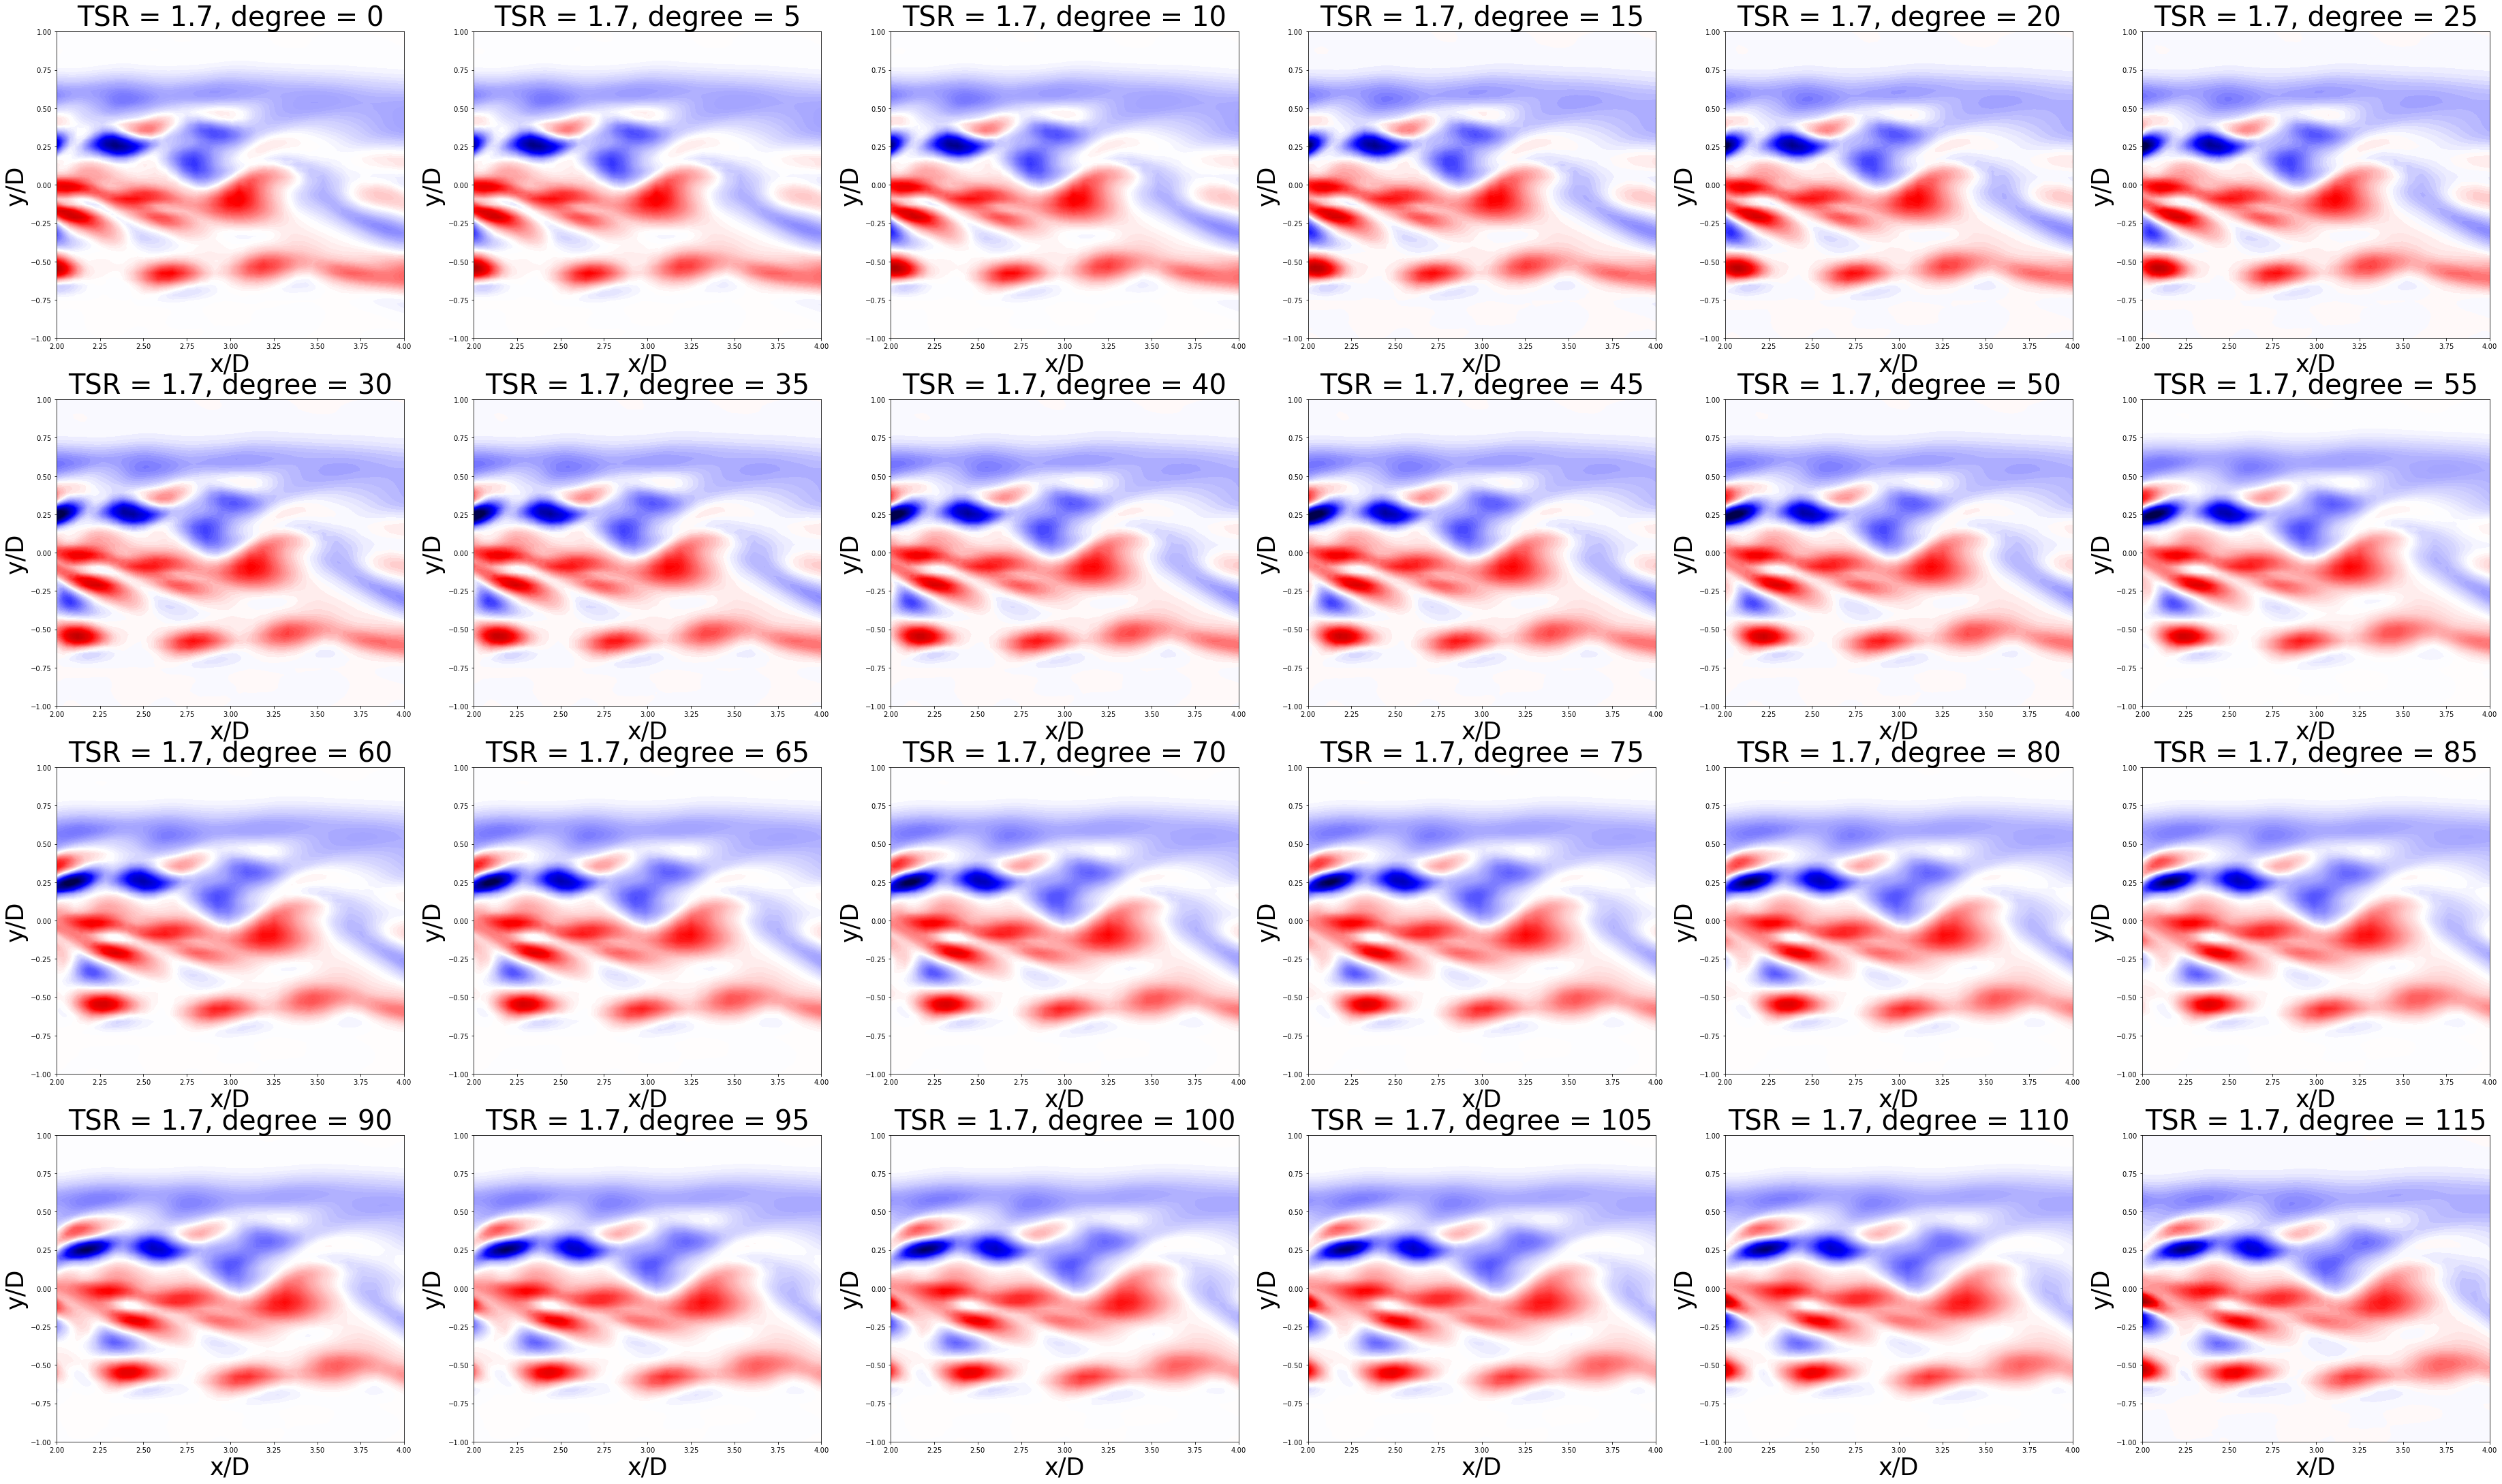

In [23]:
fig = plt.figure(figsize=(64, 48))

xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

for i in range(0, 24):
    ax = fig.add_subplot(5, 6, i+1)
    ax.contourf(xmesh, ymesh, vor17.reshape((25, 100, 100))[i], vmin=-0.7, vmax=0.7, levels=128, cmap='seismic')
    ax.set_xlabel('x/D', fontsize=35)
    ax.set_ylabel('y/D', fontsize=35)
    ax.set_title('TSR = 1.7, degree = %d' %(i*5), fontsize=40)

#cax = plt.axes([0.95, 0.15, 0.05, 0.73])
#cbar = plt.colorbar(ax, cax=cax)
#cbar.set_label('Dimensionless vorticity', fontsize=15)
#cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

#plt.suptitle('Original images (TSR = 1.7)',fontsize=20)
plt.show()

In [38]:
np.savetxt('y_output(10deg)new.csv', y_10deg.reshape(((36*3+1)*100*6, 100)), delimiter=",")
np.savetxt('y_output(5deg)new.csv', y_5deg.reshape(((72*3+1)*100*6, 100)), delimiter=",")
np.savetxt('y_output(1rev_5deg)new.csv', y_1rev.reshape(((72+1)*100*6, 100)), delimiter=",")

In [39]:
y_10deg_1rev = np.vstack((vor15_10deg[:3700,:], vor16_10deg[:3700,:], vor17_10deg[:3700,:], vor18_10deg[:3700,:],
                          vor19_10deg[:3700,:], vor20_10deg[:3700,:]))

In [40]:
np.savetxt('y_output(1rev_10deg)new.csv', y_10deg_1rev.reshape(((36+1)*100*6, 100)), delimiter=",")